San Diego Traffic Stops (2013-2017) Exploratory Data Analysis
---

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = "yg821jf8611_ca_san_diego_2020_04_01.csv.zip"
data = pd.read_csv(path)

Show the dataset features.

In [4]:
data.columns

Index(['raw_row_number', 'date', 'time', 'service_area', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_search',
       'reason_for_stop', 'raw_action_taken', 'raw_subject_race_description'],
      dtype='object')

In [18]:
data.drop(columns = ["raw_row_number", "type", "date", "time", "service_area"])

,subject_age,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,24.0,white,male,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,42.0,white,male,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,29.0,asian/pacific islander,male,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,23.0,white,male,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,35.0,hispanic,male,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,NaN,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,NaN,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,NaN,NaN,NaN,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,NaN,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [40]:
for string in data[data["arrest_made"] == True]["reason_for_search"].unique():
    if type(string) == str and '|' in string:
        print(string.split('|'))

['Consent Search', 'Search Incident To Arrest', 'Inventory Search']
['NA', 'Consent Search']
['Search incident to Arrest', 'Inventory Search']
['Contraband Visible', 'Inventory Search', 'Other']
['Search Incident To Arrest', 'Inventory Search', 'Other']
['-h Waiver Search', 'Other']
['Search Incident To Arrest', 'Inventory Search']
['Other, PER DET ON CASE', 'VEH IMPOUNDED FOR EVIDENCE']
['Contraband Visible', 'Search Incident To Arrest']
['Search Incident To Arrest', 'Other']
['Consent Search', 'Search Incident To Arrest']
['NA', 'Odor of Contraband', 'Contraband Visible', 'Consent Search']
['Odor of Contraband', 'Contraband Visible', 'Inventory Search']
['-h Waiver Search', 'Search Incident To Arrest']
['-h Waiver Search', 'Search Incident To Arrest', 'Evid of Criminal Activity']
['Consent Search', 'Search Incident To Arrest', 'Other']
['Consent Search', '-h Waiver Search', 'Search Incident To Arrest']
['Odor of Contraband', 'Inventory Search', 'Evid of Criminal Activity']
['Odor of 

Preview the dataset.

In [4]:
data.head()

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC


Fetch proportions for subject race.

In [5]:
data["subject_race"].value_counts(normalize = True)

white                     0.424906
hispanic                  0.306666
black                     0.111854
asian/pacific islander    0.085232
other                     0.071342
Name: subject_race, dtype: float64

Fetch mean for proportions of subject race.

In [6]:
data["subject_race"].value_counts(normalize = True).mean()

0.2

Fetch standard deviation for proportions of subject race.

In [7]:
data["subject_race"].value_counts(normalize = True).std()

0.15768200043726557

Plot a bar chart for subject race frequency.

Text(0, 0.5, 'Frequency')

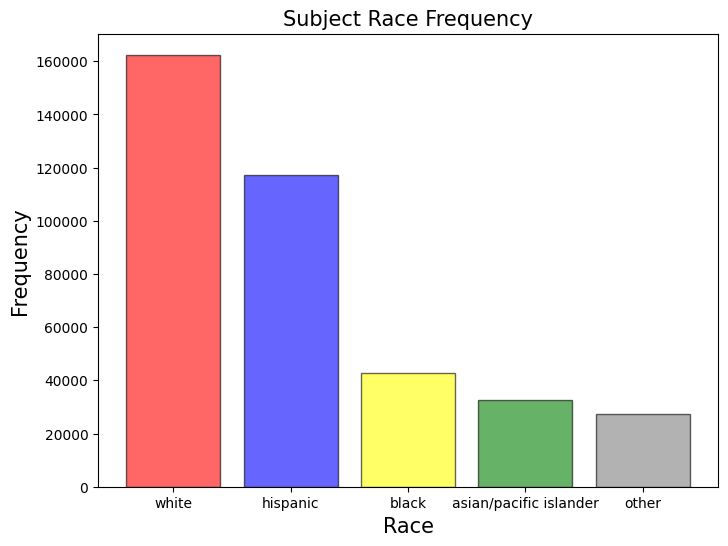

In [8]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)
plt.bar(
    data["subject_race"].value_counts().index, 
    data["subject_race"].value_counts(), 
    color = ["red", "blue", "yellow", "green", "gray"], 
    edgecolor = "black",
    alpha = 0.6
)
plt.title("Subject Race Frequency")
plt.xlabel("Race")
plt.ylabel("Frequency")

Fetch value counts for traffic stop outcomes.

In [9]:
data["outcome"].value_counts()

citation    219712
warning     119328
arrest        4815
Name: outcome, dtype: int64

Fetch proportions for race of subjects who were arrested.

In [10]:
arrests = data[data["outcome"] == "arrest"]
arrests["subject_race"].value_counts(normalize = True)

white                     0.368115
hispanic                  0.356267
black                     0.178133
asian/pacific islander    0.064228
other                     0.033257
Name: subject_race, dtype: float64

Fetch mean for proportions of race of subjects who were arrested.

In [11]:
arrests["subject_race"].value_counts(normalize = True).mean()

0.2

Fetch standard deviation for proportions of race of subjects who were arrested.

In [12]:
arrests["subject_race"].value_counts(normalize = True).std()

0.1576367081679054

Plot a bar chart for race frequency of subjects who were arrested.

Text(0, 0.5, 'Frequency')

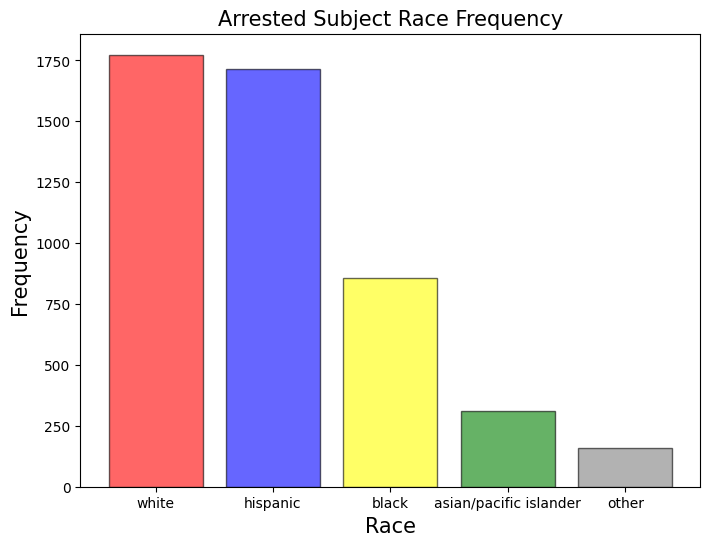

In [13]:
plt.figure(figsize = (8, 6), dpi = 100)
#plt.rc("font", size = 11)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)
plt.bar(
    arrests["subject_race"].value_counts().index, 
    arrests["subject_race"].value_counts(),
    color = ["red", "blue", "yellow", "green", "gray"],
    edgecolor = "black",
    alpha = 0.6
)
plt.title("Arrested Subject Race Frequency")
plt.xlabel("Race")
plt.ylabel("Frequency")

Make a pivot table displaying counts of arrests made conditioned on whether or not contraband was found and subject race.

In [14]:
new_data = data.copy()
new_data = new_data.dropna(subset = ["contraband_found"], axis = 0)
pivot = new_data[["subject_race", "contraband_found", "arrest_made"]].pivot_table(
    index = ["subject_race", "contraband_found"],
    columns = "arrest_made",
    aggfunc = "size"
)
pivot

arrest_made                              False  True
subject_race           contraband_found             
asian/pacific islander False               630   180
                       True                 43    52
black                  False              2929   572
                       True                187   173
hispanic               False              4818  1130
                       True                217   310
other                  False               322    84
                       True                 23    20
white                  False              2904  1068
                       True                209   307

In [15]:
pivot_ratios = pivot.copy()
pivot_sums = pivot.sum(axis = 1)
for indices in pivot.index:
    pivot_ratios.loc[indices] /= pivot_sums[indices]

Convert pivot table counts into proportions in each group.

In [16]:
pivot_ratios

arrest_made                                 False      True
subject_race           contraband_found                    
asian/pacific islander False             0.777778  0.222222
                       True              0.452632  0.547368
black                  False             0.836618  0.163382
                       True              0.519444  0.480556
hispanic               False             0.810020  0.189980
                       True              0.411765  0.588235
other                  False             0.793103  0.206897
                       True              0.534884  0.465116
white                  False             0.731118  0.268882
                       True              0.405039  0.594961

Obtain descriptive statistics for arrests made in each group.

In [17]:
pivot_ratios[True].describe()

count    10.000000
mean      0.372760
std       0.177842
min       0.163382
25%       0.210728
50%       0.366999
75%       0.530665
max       0.594961
Name: True, dtype: float64

Conclusions
---

This data source is capable of approaching racial inequity in San Diego County traffic stops / arrests made from traffic stops. A variety of races are recorded in this dataset: White, Hispanic, Black, Asian / Pacific Islander, and other races included in "Other". As indicated by the relative frequencies and bar charts, the counts of subjects in each racial group differ greatly, ranging from 42% of the subjects being white folks to 7% being of other races. The average percentage is 20% with a standard deviation of about 16%. Looking at the subjects who were arrested, the proportions look similar to the proportions for traffic stop subjects in general with the exceptions of more Hispanic and Black individuals being arrested. Like before, the average proportion is 20% with a standard deviation of about 16%. Then, examining arrests conditioned on whether or not a subject was found to have contraband and on their race, the mean percentage for arrests made in any group `(race, contraband_found)` was about 37% with a standard deviation of 17%. Because of these variations in proportions, it opens the door for follow up investigations into whether or not subjects of different races are arrested at varying rates.